## Data Analysis of Clean subset of data

In [11]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/cherna15/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/cherna15/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cherna15/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/cherna15/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cherna15/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/cherna15/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [68]:

import nltk, time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from gensim.corpora.dictionary import Dictionary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import collections, itertools

### No. of Words per Tweet in Dataset collection

In [7]:
# Import the tweets to pandas dataframe

path = 'min_tweets.json'
small_subset = pd.read_json(path, orient='table')
tweets = small_subset['full_text']


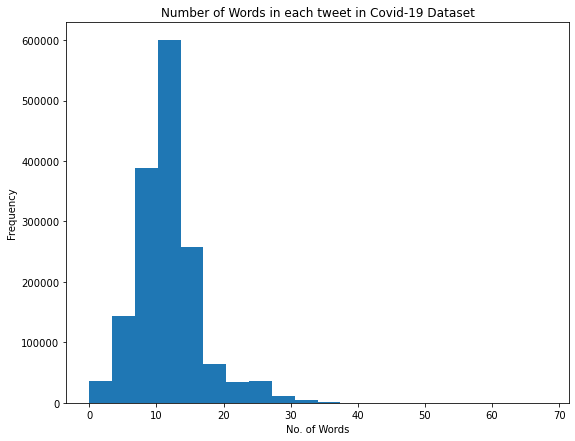

In [9]:
# Number of words in each tweet
_ = tweets.str.len().hist(grid=False, figsize=(9,7), bins=20)
_ = plt.xlabel('No. of Words')
_ = plt.ylabel('Frequency')
_ = plt.title('Number of Words in each tweet in Covid-19 Dataset')
plt.show()

Interpretation: The average is 10 words per Tweet  and Max.30 words

#### Create words Dictionary

In [13]:
dic = Dictionary(tweets)

words = tweets.apply(lambda x: dic.doc2bow(x))

words



0          [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1          [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (1...
2          [(16, 1), (19, 2), (20, 1), (21, 1), (22, 1), ...
3          [(16, 1), (30, 1), (31, 1), (32, 1), (33, 1), ...
4          [(1, 1), (16, 1), (42, 1), (43, 1), (44, 1), (...
                                 ...                        
1578200    [(1, 1), (16, 1), (129, 1), (266, 1), (350, 1)...
1578201    [(16, 1), (43, 1), (516, 1), (973, 1), (1224, ...
1578202    [(16, 1), (91, 1), (936, 1), (1473, 1), (1985,...
1578203    [(16, 1), (109, 1), (136, 1), (293, 1), (372, ...
1578204    [(16, 1), (305, 1), (616, 1), (2041, 1), (5855...
Name: full_text, Length: 1578205, dtype: object

#### Check the top 20 most frequent words in all of the tweets

In [65]:
totalCount = collections.defaultdict(int)
for word_id, iterable in itertools.chain.from_iterable(corpus):
    totalCount[word_id]+=iterable
    
sort = sorted(totalCount.items(), key=lambda kv :kv[1], reverse=True)
words = []
top_40 = []
for word_id, iterable in sort[:40]:
    words.append(dictionary.get(word_id)) 
    top_40.append(iterable)

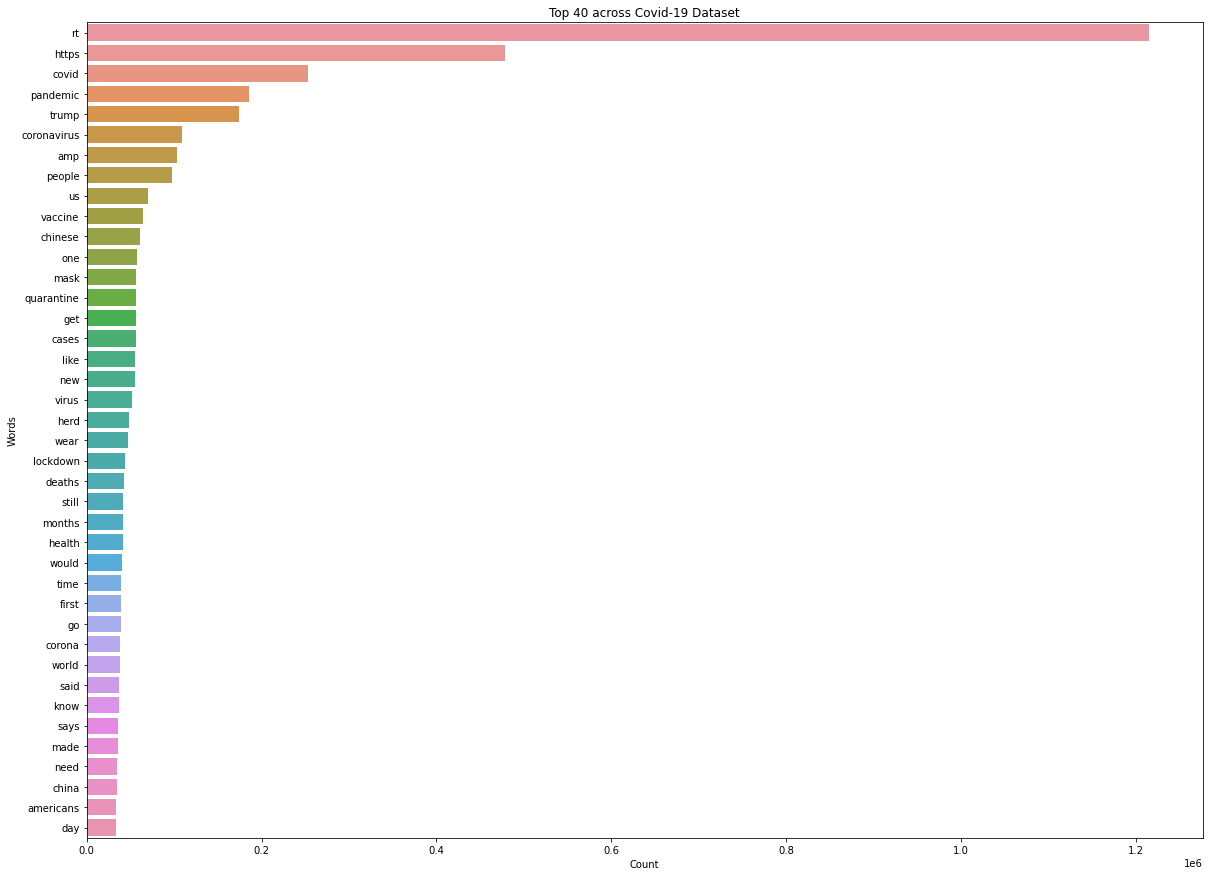

In [66]:
fig = plt.figure(figsize=(20,15))
fig = sns.barplot(x=word_counts, y=words)
fig = plt.xlabel("Count")
fig = plt.ylabel('Words')
fig = plt.title('Top 40 across Covid-19 Dataset')
plt.show()

As expected, Pandemic, Covid , Trump, Coronavirus, People, US, Quarentine, Mask, Vaccine are the words that dominate the trends.

#### Bigrams - Exploring context of the tweets with ngrams

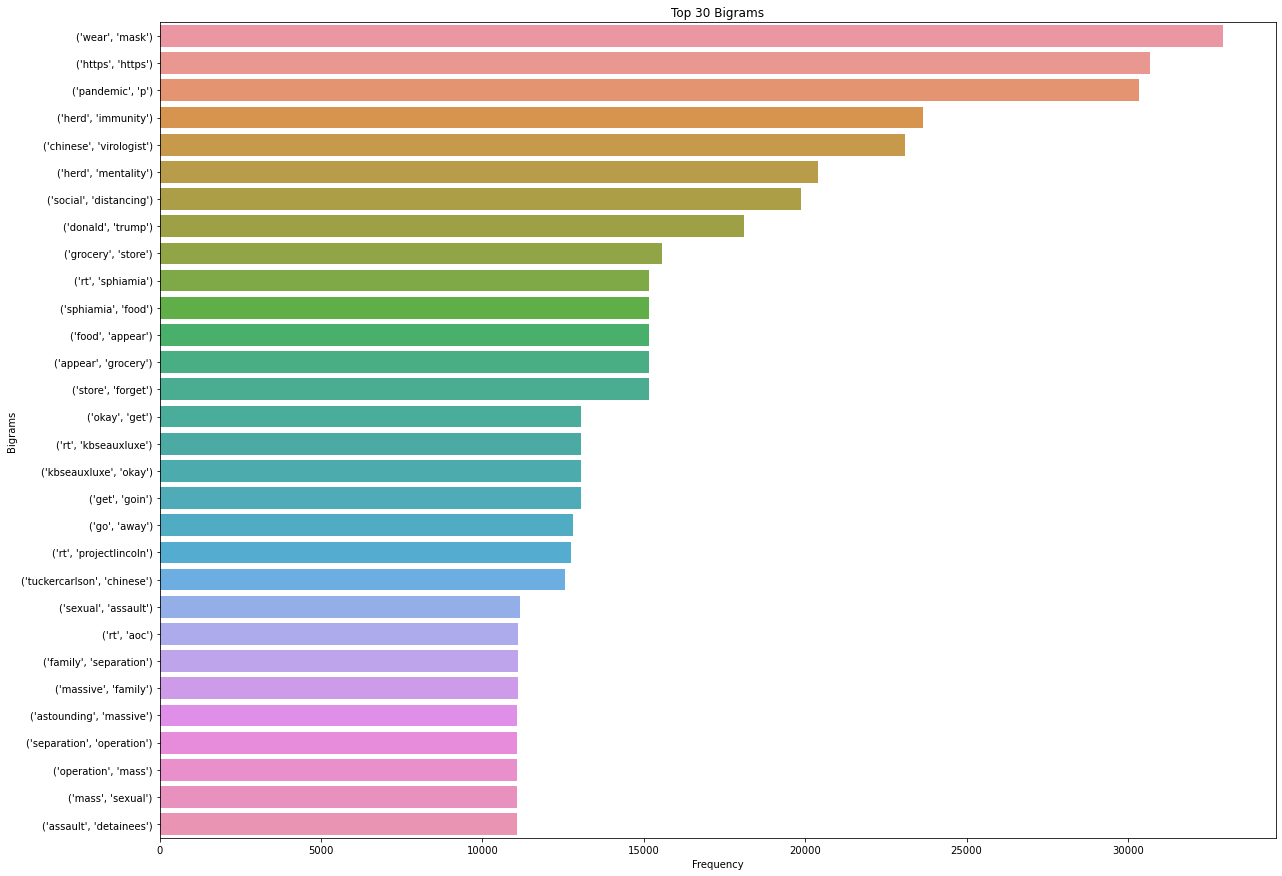

In [69]:
bigrams = tweets.apply(lambda x: ngrams(x,2))
bi_grams = bigrams.apply(lambda x: list(x))

top_30 = Counter(itertools.chain.from_iterable(bi_grams)).most_common(30)

top_bigram = pd.DataFrame(top_30, columns=['bigram', 'frequency'])
top_bigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(20,15))
_ = sns.barplot(x=top_bigram.frequency, y=top_bigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Bigrams')
_ = plt.title('Top 30 Bigrams')
plt.show()

In [68]:
bi_grams = bigrams.apply(lambda x: list(x))

In [76]:
top_30 = Counter(itertools.chain.from_iterable(bi_grams)).most_common(30)

As expected, {Wear,Mask},{Pandemic}, {heard, inmmunity}. {Chinese, Virologist}  are the words that dominate the trend is mostly found within the same tweet.

#### Trigrams - Explore the context of the tweets with ngrams

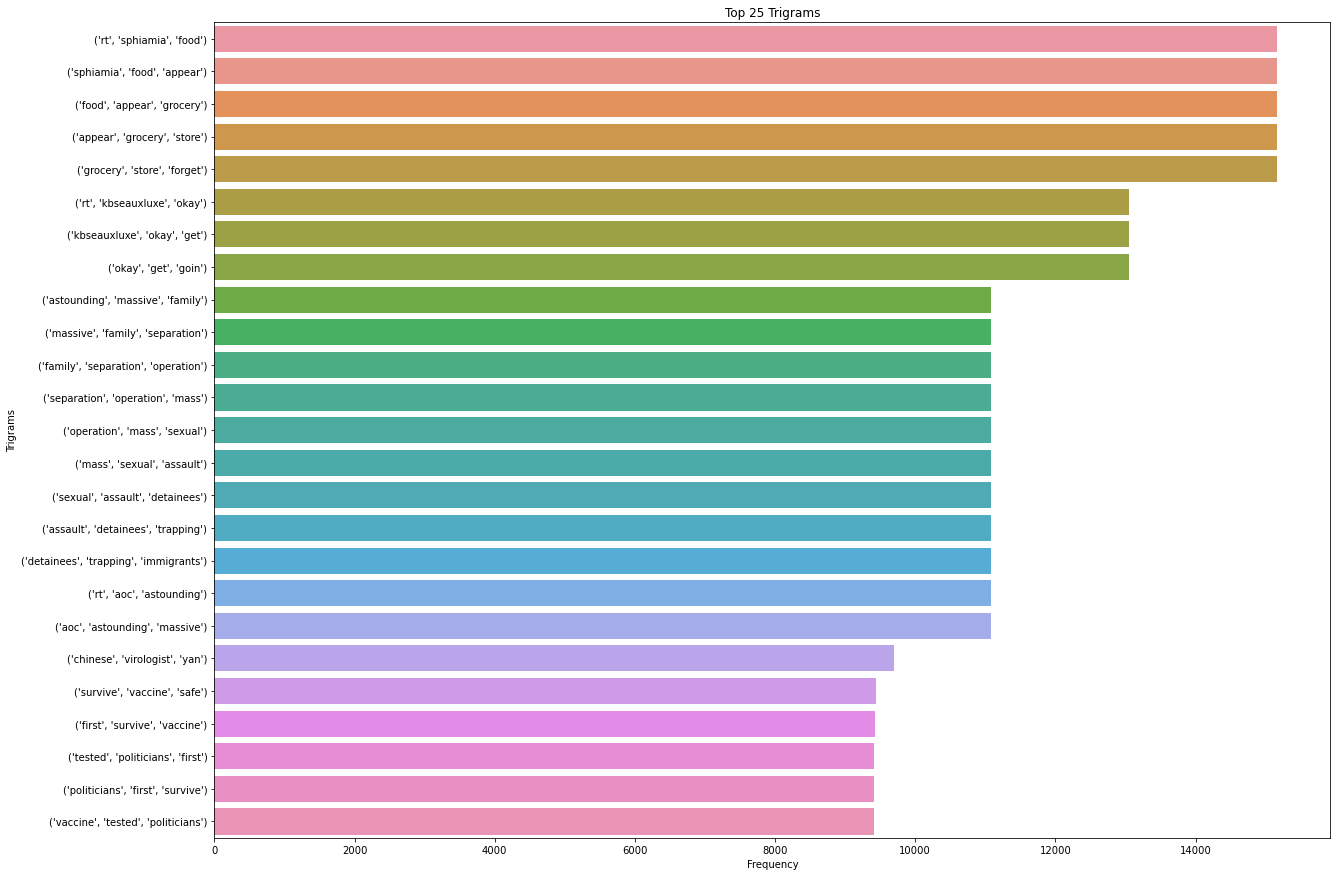

In [70]:
trigrams = tweets.apply(lambda x: ngrams(x,3))
tri_grams = trigrams.apply(lambda x: list(x))
top_25= Counter(itertools.chain.from_iterable(tri_grams)).most_common(25)
top_trigram = pd.DataFrame(top_25, columns=['bigram', 'frequency'])
top_trigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(20,15))
_ = sns.barplot(x=top_trigram.frequency, y=top_trigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Trigrams')
_ = plt.title('Top 25 Trigrams')
plt.show()

#### Wordcloud

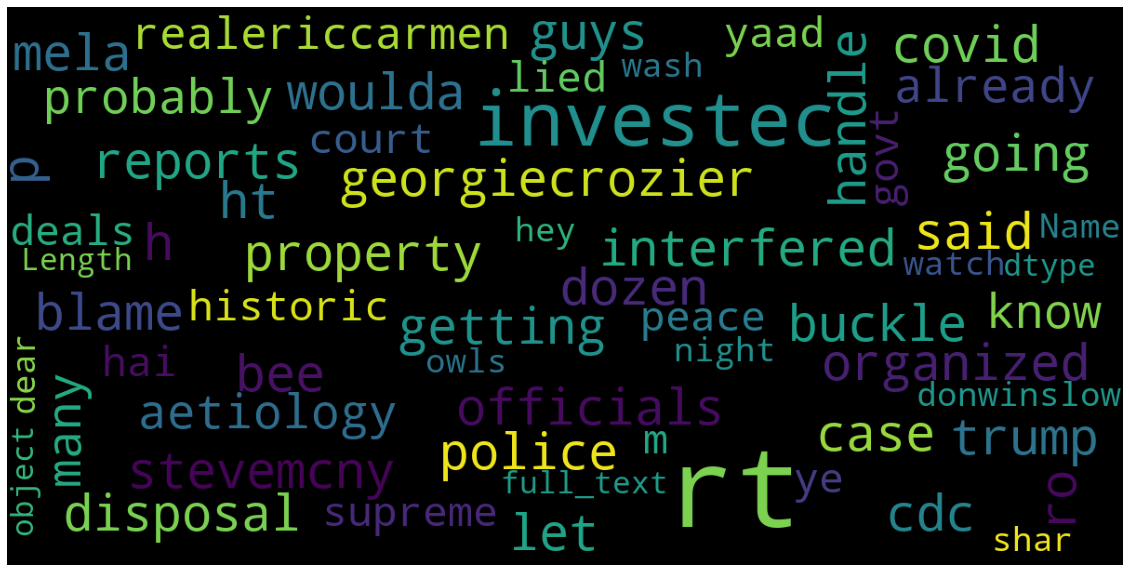

In [84]:
stop = set(STOPWORDS)
def render_wordCloud(data):
    words_cloud = WordCloud(
        background_color='black',
        stopwords=stop,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1)
    
    wordcloud=words_cloud.generate(str(data))
    
    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    plt.imshow(words_cloud)
    plt.show()

render_wordCloud(tweets)